### Context

League of Legends adalah MOBA (Multiplayer Online Battle Arena) di mana dalam permainannya terdapat 2 tim (biru dan merah) yang saling berhadapan. Dalam satu laga permainan, ada 3 jalur yang dijadikan medan perang, hutan dan pemainnya terbagi jadi 5 peran. Tujuan permainan ini adalah menjatuhkan Nexus atau base musuh dan memenangkan permainan.

### Content

Diketahui dataset berisi 10 menit dari pertandingan.  Game yang dimainkan berperingkat 10k (SOLO QUEUE Player) dari ELO Diamond I hingga level Master. ELO sendiri merupakan teknik pencarian pemain dengan peringkat atau tingkat keterampilan yang sejenis. Setiap permainan yang terjadi itu unik. GameId dapat membantu kamu mengambil lebih banyak atribut dari Riot API pada kolom dataset. 

Dari data Glossary & Variables, diketahui terdapat 19 fitur pertim (total 38) yang dikumpulkan setelah 10 menit game berlangsung. Data ini termasuk pembunuhan, kematian, emas, pengalaman dan level. Di sini kamu dibebaskan untuk melakukan beberapa rekayasa fitur untuk mendapatkan lebih banyak wawasan atau insight. 

Pada data diketahui juga bahwa kolom blueWins adalah nilai target atau nilai yang akan coba diprediksi, di mana jika Nilai 1 berarti tim biru menang, sedangkan jika Nilai 0 maka sebaliknya. 

### Glossary

- Warding totem: Item yang dapat diletakkan pemain di peta untuk mengungkap area terdekat. Sangat berguna untuk kontrol peta/tujuan. 
- Minions: Item yang dapat diletakkan pemain di peta untuk mengungkap area terdekat. Sangat berguna untuk kontrol peta/tujuan.
- Jungle minions: NPC milik NO TEAM. Mereka memberi emas dan buff saat dibunuh oleh pemain.
- Elite monsters: Monster dengan hp/damage tinggi yang memberikan bonus besar (gold/XP/stat) saat dibunuh oleh tim.
- Dragons: Monster elit yang memberikan bonus tim saat terbunuh. Naga ke-4 yang dibunuh oleh tim memberikan bonus statistik yang sangat besar. The - - 5th dragon (Elder Dragon) menawarkan keuntungan besar bagi tim.
- Herald: Monster elit yang memberikan bonus statistik saat dibunuh oleh pemain. Ini membantu untuk mendorong jalur dan menghancurkan struktur.
- Towers: Struktur yang harus Anda hancurkan untuk mencapai Nexus musuh. Mereka memberi emas.
- Level: Champion level. Mulai dari 1. Maksimal 18.

### Variables

1.	Gameid : ID RIOT unik dari game. Dapat digunakan dengan Riot Games API.
2.	Bluewins: Kolom target. 1 jika tim biru menang, 0 sebaliknya.
3.	blueWardsPlaced Jumlah totem penangkal yang ditempatkan oleh tim biru di peta
4.	blueWardsDestroyed : Jumlah totem penangkal musuh yang telah dihancurkan oleh tim biru
5.	blueFirstBlood : Pembunuhan pertama dari permainan. 1 jika tim biru melakukan pembunuhan pertama, 0 sebaliknya
6.	blueKills : Jumlah musuh yang dibunuh oleh tim biru
7.	blueDeaths : Jumlah kematian (tim biru)
8.	blueAssists : Jumlah assist kill (tim biru)
9.	blueEliteMonsters : Jumlah monster elit yang dibunuh oleh tim biru (Dragons and Heralds)
10.	blueDragons : Jumlah naga yang dibunuh oleh tim biru
11.	blueHeralds :  Jumlah tentara yang dibunuh oleh tim biru
12.	blueTowersDestroyed : Jumlah bangunan yang dihancurkan oleh tim biru (menara...)
13.	blueTotalGold : Tim biru total emas
14.	blueAvgLevel : Tingkat juara rata-rata tim biru
15.	blueTotalExperience : Pengalaman total tim biru
16.	blueTotalMinionsKilled : Total minion tim biru terbunuh (CS)
17.	blueTotalJungleMinionsKilled : Total monster hutan tim biru terbunuh
18.	blueGoldDiff : Perbedaan emas tim biru dibandingkan dengan tim musuh
19.	blueExperienceDiff : Tim biru mengalami perbedaan dibandingkan dengan tim musuh
20.	blueCSPerMin : CS tim biru (antek) per menit
21.	blueGoldPerMin : Emas tim biru per menit
22.	redWardsPlaced : Jumlah totem penangkal yang ditempatkan oleh tim merah di peta
23.	redWardsDestroyed : Jumlah totem penangkal musuh yang telah dihancurkan oleh tim merah
24.	redFirstBlood : Pembunuhan pertama dari permainan. 1 jika tim merah melakukan pembunuhan pertama, 0 sebaliknya
25.	redKills : Jumlah musuh yang dibunuh oleh tim merah
26.	redDeaths : Jumlah kematian (tim merah)
27.	redAssists: Jumlah assist kill (tim merah)
28.	redEliteMonsters : Jumlah monster elit yang dibunuh oleh tim merah (Dragons and Heralds)
29.	redDragons : Jumlah naga yang dibunuh oleh tim merah
30.	redHeralds: Jumlah bentara yang dibunuh oleh tim merah
31.	redTowersDestroyed : Jumlah bangunan yang dihancurkan oleh tim merah (menara)
32.	redTotalGold: Tim merah total emas
33.	redAvgLevel: Tingkat juara rata-rata tim merah
34.	redTotalExperience: Pengalaman total tim merah
35.	redTotalMinionsKilled : Total minion tim merah tewas (CS)
36.	redTotalJungleMinionsKilled : Total monster hutan tim merah terbunuh
37.	redGoldDiff : Perbedaan emas tim merah dibandingkan dengan tim musuh
38.	redExperienceDiff : Tim merah mengalami perbedaan dibandingkan dengan tim musuh
39.	redCSPerMin : CS tim merah (antek) per menit
40.	redGoldPerMin : Emas tim merah per menit

## 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Data
LoL = pd.read_csv('high_diamond_ranked_10min.csv')

In [3]:
LoL.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [4]:
# Checking the shape of the data
LoL.shape

(9879, 40)

## 2. Basic EDA & Data Preprocessing

In [5]:
# Checking null values
LoL_isnull = LoL.isnull().sum()
LoL_isnull

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

In [6]:
# checking data types of the columns
LoL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [7]:
#checking for quasi constants
print("Mengecek nilai unik pada data")
LoL.nunique()


Mengecek nilai unik pada data


gameId                          9879
blueWins                           2
blueWardsPlaced                  147
blueWardsDestroyed                27
blueFirstBlood                     2
blueKills                         21
blueDeaths                        21
blueAssists                       30
blueEliteMonsters                  3
blueDragons                        2
blueHeralds                        2
blueTowersDestroyed                5
blueTotalGold                   4739
blueAvgLevel                      17
blueTotalExperience             4143
blueTotalMinionsKilled           148
blueTotalJungleMinionsKilled      74
blueGoldDiff                    6047
blueExperienceDiff              5356
blueCSPerMin                     148
blueGoldPerMin                  4739
redWardsPlaced                   151
redWardsDestroyed                 25
redFirstBlood                      2
redKills                          21
redDeaths                         21
redAssists                        28
r

Seperti yang terlihat di atas, tidak ada kolom dengan nilai 1 atau sama secara keseluruhan

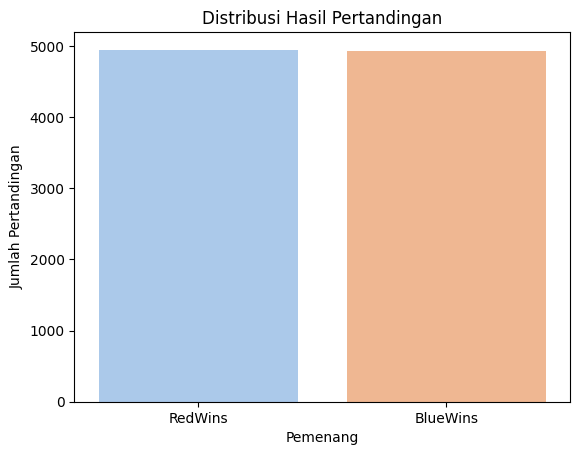

Distribusi Hasil Pertandingan


whoWins
RedWins     4949
BlueWins    4930
Name: count, dtype: int64

In [8]:
# Bar plot of the outcomes to see how they are distributed
LoL["whoWins"] = LoL.blueWins.map({0:"RedWins", 1:"BlueWins"})

# Buat plot batang untuk melihat distribusi hasil pertandingan
sns.countplot(x='whoWins', data=LoL, hue='whoWins', palette='pastel')
plt.title('Distribusi Hasil Pertandingan')
plt.xlabel('Pemenang')
plt.ylabel('Jumlah Pertandingan')
plt.show()

print('Distribusi Hasil Pertandingan')
value_counts = LoL['whoWins'].value_counts()
value_counts

In [9]:
# Value counts data blueWins
print('Distribusi pertandingan biru')
value_counts = LoL['blueWins'].value_counts()
value_counts = value_counts.rename({0: 'blue lose', 1: 'blue win'})

value_counts

Distribusi pertandingan biru


blueWins
blue lose    4949
blue win     4930
Name: count, dtype: int64

# Buatlah catatan dari hasil data preprocessing

#### Importing required libraries

In [10]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, OneHotEncoder
from sklearn.feature_selection import mutual_info_classif, SelectKBest, VarianceThreshold
from sklearn.impute import SimpleImputer, KNNImputer
from scipy.stats import spearmanr
import itertools

In [11]:
X=LoL.drop(['blueWins', 'gameId'], axis=1)
y=LoL['blueWins']

Dropping gameID column as it is only an ID and has different value for each row

## 3. Data Splitting into train and test set

In [12]:
#Splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [13]:
for set in [X_train, X_test, y_train, y_test]:
    print(set.head())
    print(type(set))
    print(set.shape)
    print('')

      blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  blueKills  \
2393               11                   3               0          7   
4211               91                   3               1          6   
7684               20                   6               1         11   
2364               16                   2               1          2   
8114               12                   4               0          5   

      blueDeaths  blueAssists  blueEliteMonsters  blueDragons  blueHeralds  \
2393           3            7                  0            0            0   
4211           1            4                  2            1            1   
7684           8           12                  1            1            0   
2364          11            2                  1            1            0   
8114           4            7                  1            1            0   

      blueTowersDestroyed  ...  redTotalGold  redAvgLevel  redTotalExperience  \
2393             

In [14]:
#Memastikan y_train dan y_test memiliki ratio yang sama
y_train.value_counts(normalize=True)

blueWins
0    0.500949
1    0.499051
Name: proportion, dtype: float64

In [15]:
#Memastikan y_train dan y_test memiliki ratio yang sama
y_test.value_counts(normalize=True)

blueWins
0    0.501012
1    0.498988
Name: proportion, dtype: float64

## X_train

In [16]:
#Pisahkan data numerik dan objek
X_train_num = X_train.select_dtypes('number')
X_train_cat = X_train.select_dtypes('object')

## X_test

In [17]:
#Pisahkan data numerik dan objek
X_test_num = X_test.select_dtypes('number')
X_test_cat = X_test.select_dtypes('object')

### 4. Feature Selection and Compare Each Model

## Method 1: Feature Selection using different methods and checking with different models

## Feature Selection using Feature importance of Random Forest Classifier

In [18]:
sel_rf=SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=1))

sel_rf.fit(X_train_num, y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=1))

In [19]:
sel_rf.get_support()

array([False, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True,  True,  True,  True,
        True,  True])

As you can see, lot of features have been set as False depicting that they are not as important as other features

How many features remain after above procedure

In [20]:
print("Total number of features in the database: ", len(X_train_num.columns))
print("Total number of features after removing according to RF feature importances: ", sel_rf.get_support().sum())
print("Total features removed: ", int(len(X_train_num.columns) - sel_rf.get_support().sum()))

Total number of features in the database:  38
Total number of features after removing according to RF feature importances:  16
Total features removed:  22


Let's transformed the data now and check the accuracy

In [21]:
X_train_rfc=sel_rf.transform(X_train_num)
X_test_rfc=sel_rf.transform(X_test_num)

In [22]:
# Let's check the shape of the data now to confirm that they have 16 features now
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran X_train_num:", X_train_num.shape)
print("Ukuran X_test_num:", X_test_num.shape)
print("Ukuran X_train_rfc:", X_train_rfc.shape)
print("Ukuran X_test_rfc:", X_test_rfc.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)

Ukuran X_train: (7903, 39)
Ukuran X_test: (1976, 39)
Ukuran X_train_num: (7903, 38)
Ukuran X_test_num: (1976, 38)
Ukuran X_train_rfc: (7903, 16)
Ukuran X_test_rfc: (1976, 16)
Ukuran y_train: (7903,)
Ukuran y_test: (1976,)


Let's create a function with RandomForest and Gradient Boost Classifier, once we find the best classifier, we can further fine tune it using hyperparameter tuning

In [23]:
def classifier_model(X_train_num, X_test_num, y_train, y_test, method, data):
    rf_clf=RandomForestClassifier(n_estimators=1000, random_state=42)
    rf_clf.fit(X_train_num, y_train)
    y_pred_rf = rf_clf.predict(X_test_num)
    score_rlf=accuracy_score(y_test, y_pred_rf)
    print("---Feature Selection method: {}---". format(method))
    print("---Checking Accuracy with {}---".format(data))
    print("The accuracy score of Random Forest:", score_rlf)
    
    
    gb_clf=GradientBoostingClassifier(n_estimators=1000, random_state=42)
    gb_clf.fit(X_train_num, y_train)
    y_pred_gb=gb_clf.predict(X_test_num)
    score_gb=accuracy_score(y_test, y_pred_gb)
    print("The accuracy score of Gradient Boosting:", score_rlf)


Accuracy with Reduced features

In [24]:
classifier_model(X_train_rfc, X_test_rfc, y_train, y_test, "Random Forest Feature importance", "Reduced Features")

---Feature Selection method: Random Forest Feature importance---
---Checking Accuracy with Reduced Features---
The accuracy score of Random Forest: 0.7140688259109311
The accuracy score of Gradient Boosting: 0.7140688259109311


Accuracy with all features

In [25]:
classifier_model(X_train_num, X_test_num, y_train, y_test, "Random Forest Feature importance", "All Features")

---Feature Selection method: Random Forest Feature importance---
---Checking Accuracy with All Features---
The accuracy score of Random Forest: 0.7181174089068826
The accuracy score of Gradient Boosting: 0.7181174089068826


Seperti yang Anda lihat di atas, akurasi berkurang setelah fitur dihapus; oleh karena itu, mari kita periksa beberapa metode lain untuk mengurangi ruang fitur

## Feature Selection using Recursive feature extraction (RFE)

In [26]:
sel_rfe=RFE(RandomForestClassifier(n_estimators=100, random_state=42),n_features_to_select=20)
sel_rfe.fit(X_train_num, y_train)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=20)

In [27]:
# Total features selected:
sel_rfe.get_support().sum()

20

In [28]:
#### Let's transform the data now;
X_train_rfe=sel_rfe.transform(X_train_num)
X_test_rfe=sel_rfe.transform(X_test_num)

#### Let's run the classifiers now

#### Accuracy with reduced features

In [29]:
classifier_model(X_train_rfe, X_test_rfe, y_train, y_test, "Recursive feature extraction with RF", "Reduced Features")

---Feature Selection method: Recursive feature extraction with RF---
---Checking Accuracy with Reduced Features---
The accuracy score of Random Forest: 0.7069838056680162
The accuracy score of Gradient Boosting: 0.7069838056680162


#### Accuracy with All features

In [30]:
classifier_model(X_train_num, X_test_num, y_train, y_test, "Recursive feature extraction with RF", "All Features")

---Feature Selection method: Recursive feature extraction with RF---
---Checking Accuracy with All Features---
The accuracy score of Random Forest: 0.7181174089068826
The accuracy score of Gradient Boosting: 0.7181174089068826


#### Recursive Feature extraction using Gradient Boosting

In [31]:
sel_rfe_gb=RFE(GradientBoostingClassifier(n_estimators=100, random_state=42), n_features_to_select=22)
sel_rfe_gb.fit(X_train_num, y_train)

X_train_rfe_gb=sel_rfe_gb.transform(X_train_num)
X_test_rfe_gb=sel_rfe_gb.transform(X_test_num)

### 5. Modelling and Evaluation

#### Let's run the model

#### Accuracy with reduced features

In [32]:
classifier_model(X_train_rfe_gb, X_test_rfe_gb, y_train, y_test, "Recursive feature extraction with GB", "Reduced Features")

---Feature Selection method: Recursive feature extraction with GB---
---Checking Accuracy with Reduced Features---
The accuracy score of Random Forest: 0.7206477732793523
The accuracy score of Gradient Boosting: 0.7206477732793523


#### Gradient boosting algorithm had the highest accuracy. Now let's check how many number of features will give the best accuracy

In [33]:
for index in range(14,39):
    sel_rfe_gb=RFE(GradientBoostingClassifier(n_estimators=100, random_state=42), n_features_to_select=index)
    sel_rfe_gb.fit(X_train_num, y_train)

    X_train_rfe_gb=sel_rfe_gb.transform(X_train_num)
    X_test_rfe_gb=sel_rfe_gb.transform(X_test_num)
    
    clf_gb=GradientBoostingClassifier(n_estimators=200, random_state=42)
    clf_gb.fit(X_train_rfe_gb, y_train)
    y_pred_gb=clf_gb.predict(X_test_rfe_gb)
    score_gb=accuracy_score(y_test, y_pred_gb)
    print("Number of features: ", index)
    print("Accuracy: ", score_gb)
    print()


Number of features:  14
Accuracy:  0.7246963562753036

Number of features:  15
Accuracy:  0.7252024291497976

Number of features:  16
Accuracy:  0.7282388663967612

Number of features:  17
Accuracy:  0.7282388663967612

Number of features:  18
Accuracy:  0.7226720647773279

Number of features:  19
Accuracy:  0.7236842105263158

Number of features:  20
Accuracy:  0.7236842105263158

Number of features:  21
Accuracy:  0.72165991902834

Number of features:  22
Accuracy:  0.7231781376518218

Number of features:  23
Accuracy:  0.7231781376518218

Number of features:  24
Accuracy:  0.7206477732793523

Number of features:  25
Accuracy:  0.7211538461538461

Number of features:  26
Accuracy:  0.7176113360323887

Number of features:  27
Accuracy:  0.7196356275303644

Number of features:  28
Accuracy:  0.7155870445344129

Number of features:  29
Accuracy:  0.7155870445344129

Number of features:  30
Accuracy:  0.715080971659919

Number of features:  31
Accuracy:  0.7155870445344129

Number of fea

#### It is clear from above that best selection of features are 16:

Now transforming the data with 16 features only and then running on different models to select the best model

In [47]:
sel_rfe_gb_new=RFE(GradientBoostingClassifier(n_estimators=1000, random_state=1), n_features_to_select=16)
sel_rfe_gb_new.fit(X_train_num, y_train)

X_train_final=sel_rfe_gb_new.transform(X_train_num)
X_test_final=sel_rfe_gb_new.transform(X_test_num)

### GRADIENT BOOST CLASSIFIER

#### Checking with reduced and important features

In [48]:
gb_clf_1=GradientBoostingClassifier(n_estimators=400, random_state=42)

gb_clf_1.fit(X_train_final, y_train)
y_pred_gb_1=gb_clf_1.predict(X_test_final)

score_gb_1=accuracy_score(y_test, y_pred_gb_1)

print("Accuracy:" ,score_gb_1)

Accuracy: 0.715080971659919


In [49]:
params_grid_gb={'n_estimators' : [100,200,400,600,1000,1200],
                'min_samples_split': [100,200,300,400],
                'min_samples_leaf' : [10,20,30,40,60,100],
                'max_depth' : [2,4,6,8],
                'learning_rate' : [0.01, 0.05, 0.1, 0.5, 1, 5, 10]
               }

In [50]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

gridsearch_gb=RandomizedSearchCV(estimator=GradientBoostingClassifier(), param_distributions=params_grid_gb, cv=5, scoring='accuracy')

In [51]:
gridsearch_gb.fit(X_train_final, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.5,
                                                          1, 5, 10],
                                        'max_depth': [2, 4, 6, 8],
                                        'min_samples_leaf': [10, 20, 30, 40, 60,
                                                             100],
                                        'min_samples_split': [100, 200, 300,
                                                              400],
                                        'n_estimators': [100, 200, 400, 600,
                                                         1000, 1200]},
                   scoring='accuracy')

In [52]:
gridsearch_gb.best_score_

0.6964456080513054

In [53]:
gridsearch_gb.best_params_

{'n_estimators': 1200,
 'min_samples_split': 100,
 'min_samples_leaf': 10,
 'max_depth': 6,
 'learning_rate': 0.05}

In [54]:
#### Checking accuracy on Test set
y_pred_final_gb=gridsearch_gb.predict(X_test_final)

print("Accuracy of GBM with accuracy_scoreced features on test set", accuracy_score(y_test, y_pred_final_gb))

Accuracy of GBM with accuracy_scoreced features on test set 0.6998987854251012


#### checking the model with all features

In [55]:
gridsearch_gb.fit(X_train_num, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.5,
                                                          1, 5, 10],
                                        'max_depth': [2, 4, 6, 8],
                                        'min_samples_leaf': [10, 20, 30, 40, 60,
                                                             100],
                                        'min_samples_split': [100, 200, 300,
                                                              400],
                                        'n_estimators': [100, 200, 400, 600,
                                                         1000, 1200]},
                   scoring='accuracy')

In [56]:
gridsearch_gb.best_score_

0.7293442701702976

In [57]:
gridsearch_gb.best_params_

{'n_estimators': 100,
 'min_samples_split': 200,
 'min_samples_leaf': 30,
 'max_depth': 4,
 'learning_rate': 0.01}

In [58]:
#### Checking accuracy on Test set
y_pred_final_gb_all=gridsearch_gb.predict(X_test_num)

print("Accuracy of GBM with all features on test set", accuracy_score(y_test, y_pred_final_gb_all))

Accuracy of GBM with all features on test set 0.7206477732793523


#### As we see that maximum accuracy achieved was 